In [1]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
#load data
df = pd.read_csv("LoanPerGrade.csv")

In [3]:
#check the dataset 
df.head()


,loan_amnt,int_rate,Term,annual_inc,emp_length,home_own,Loan_purpose,total_pymnt,Prncp_Rec,Interest_Rec,Interest_Rec.1,Grade
0,10000,11,1,35000,3,2,3,385,285,100,1,2
1,5000,14,1,25440,1,3,3,719,619,100,1,3
2,10000,6,1,90000,1,1,2,607,506,101,1,1
3,10000,6,1,60000,5,1,2,607,506,101,1,1
4,10000,6,1,115000,2,1,3,607,506,101,1,1


In [17]:
#Check data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4632 entries, 0 to 4631
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   loan_amnt       4632 non-null   int64
 1   int_rate        4632 non-null   int64
 2   Term            4632 non-null   int64
 3   annual_inc      4632 non-null   int64
 4   emp_length      4632 non-null   int64
 5   home_own        4632 non-null   int64
 6   Loan_purpose    4632 non-null   int64
 7   total_pymnt     4632 non-null   int64
 8   Prncp_Rec       4632 non-null   int64
 9   Interest_Rec    4632 non-null   int64
 10  Interest_Rec.1  4632 non-null   int64
 11  Grade           4632 non-null   int64
dtypes: int64(12)
memory usage: 434.4 KB


In [18]:
#Check for null values
df.columns

Index(['loan_amnt', 'int_rate', 'Term', 'annual_inc', 'emp_length', 'home_own',
       'Loan_purpose', 'total_pymnt', 'Prncp_Rec', 'Interest_Rec',
       'Interest_Rec.1', 'Grade'],
      dtype='object')

In [6]:
# Remove null values
# df.dropna(inplace = True)

# EDA

In [22]:
numerical_columns = ['loan_amnt', 'int_rate','annual_inc','total_pymnt', 'Prncp_Rec', 'Interest_Rec']
categorical_columns = [col for col in df.columns if col not in numerical_columns]

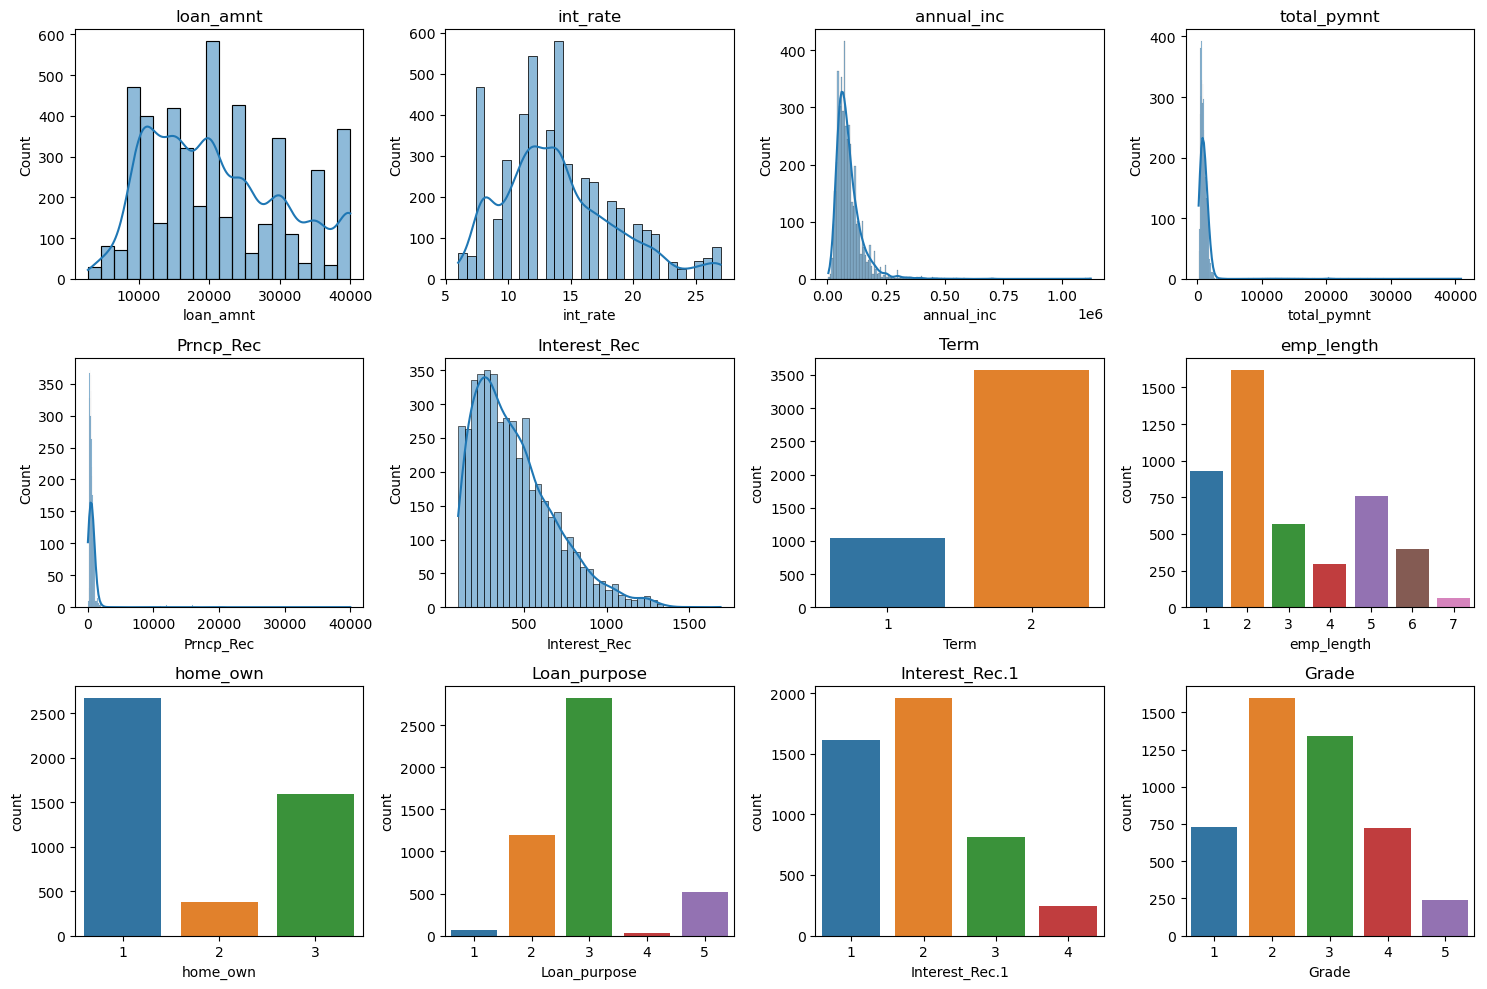

In [23]:
# Plotting subplots
num_rows = 3
num_cols = (len(numerical_columns) + len(categorical_columns) + num_rows - 1) // num_rows
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

for i, column in enumerate(numerical_columns):
    row = i // num_cols
    col = i % num_cols
    sns.histplot(df[column], ax=axes[row][col], kde=True)
    axes[row][col].set_title(column)

for i, column in enumerate(categorical_columns):
    row = (i + len(numerical_columns)) // num_cols
    col = (i + len(numerical_columns)) % num_cols
    sns.countplot(data=df, x=column, ax=axes[row][col])
    axes[row][col].set_title(column)

plt.tight_layout()
plt.show()

## Bivariate

c:\Users\m.pham\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


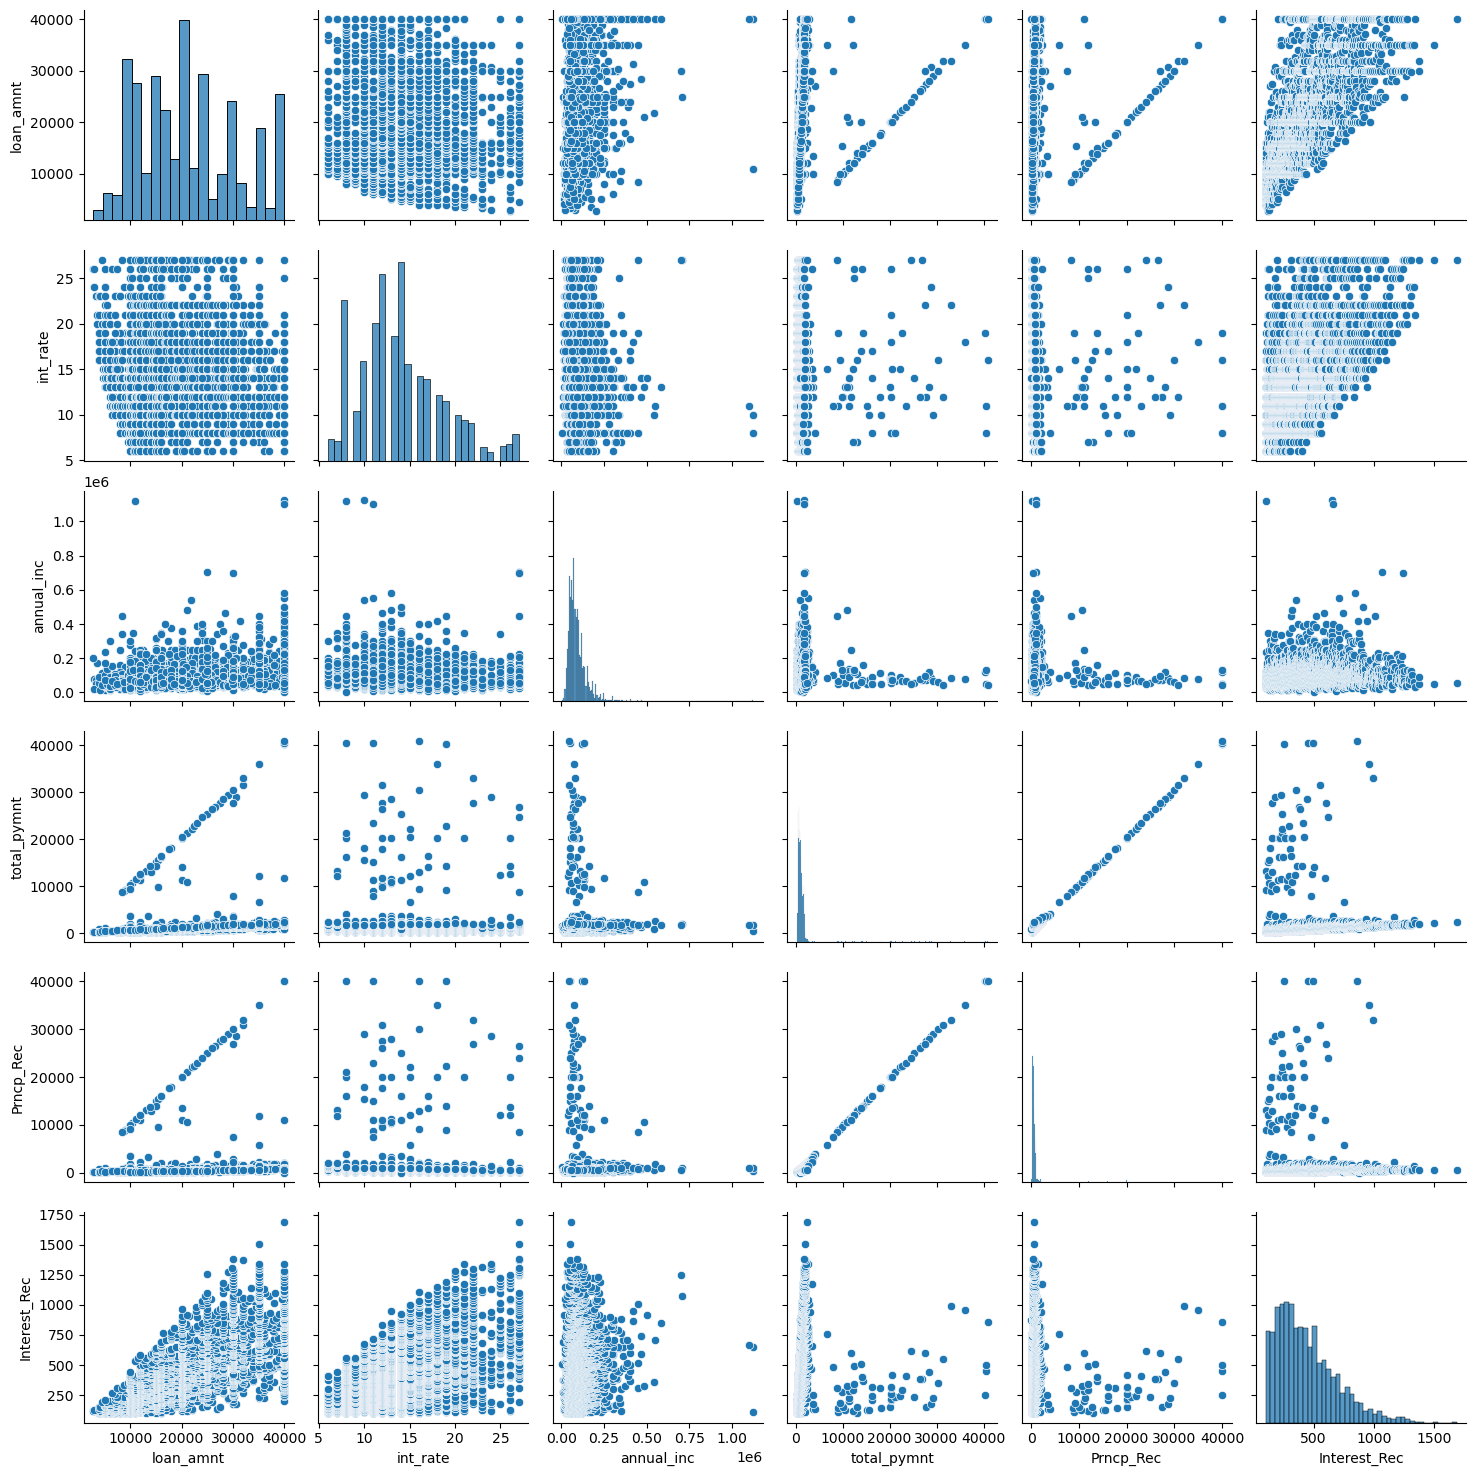

In [24]:
sns.pairplot(df[numerical_columns])

# Model

In [25]:
#Define x and y variables
x = df.drop('Grade', axis=1)
y = df['Grade']

In [26]:
#split dataset 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


In [27]:
#create the model
LoanGDModel = RandomForestClassifier()
LoanGDModel.fit(x_train, y_train)

RandomForestClassifier()

In [28]:
#check result of training the model 
LoanGDModel.score(x_train, y_train)

1.0

In [29]:
#check result of test data 
LoanGDModel.score(x_test, y_test)

0.9978417266187051

In [30]:
#create prediction
y_pred = LoanGDModel.predict(x_test)

In [31]:
#evaluate the model - confusion matrix
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[216   0   0   0   0]
 [  0 473   0   0   0]
 [  0   0 408   0   0]
 [  0   0   0 212   0]
 [  0   0   0   3  78]]


In [32]:
#add the predicted and actual values into a new dataframe
LoanGDModel_df=pd.DataFrame({'Actual': y_test, 'predicted': y_pred})

In [33]:
LoanGDModel_df.head()

,Actual,predicted
3613,2,2
1575,4,4
2136,2,2
3826,2,2
4364,3,3


In [34]:
# Save the new dataframe to Excel
# LoanGDModel_df.to_csv("Custgrade.csv")


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e305b809-8280-457a-b169-ab027e8d4813' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>